# Modeling Forest Fires Using Cellular Automata 
## Authors: Ali Kazmi, Kenji Bomar 
## CX 4230 Project 2 

## Tutorial goals
In this tutorial, you will learn about Cellular Automata (CA) and how to use them to model forest fires! We will take you from the basic ideas of the field to modern (data driven) hybrid approaches that can model real fires.  

Prerequisites: You should be able to read basic python code. We'll take you through the rest! 

Forest fires are an important phenomena worldwide. Picture nearby neighborhoods being burned, wildlife being decimated, and smoke polluting the enviornment. Each year, forest fires destroy millions of acres of land. For example, the Lutz Creek fire in British Columbia in August 2018 burned 100,000 hectares (1 hectare is ~2.5 acres)! If we were able to accurately predict where these fires would spread in realtime, we could potentially allocate fire fighters and resources more efficiently, and advise those who need to evacuate with higher certainty. In this tutorial you will learn about some modern methods that have been tried on this problem! 

## Outline: 
### 0: Introduction to Cellular Automata
- 0.1: Terminology 
- 0.2: Code for a simple 1D Cellular Automata: Sierpinski Triangle 
- 0.3: Other 1D Cellular Automata 
- 0.4: Classic 2D Cellular Automata: Game of Life
- 0.5: Analyzing Cellular Automata
- 0.6: Hexagonal Grids 
- 0.7: Voronoi Grids 
- 0.8: Cellular Automata within Theoretical Computer Science

### 1: Applications to Forest fires
- 1.1: A simple Cellular Automata model of forest fires 
- 1.2: Analysis of our simple cellular automata model
- 1.3: Stochastic Hexagonal grid model
- 1.4: Stochastic Voronoi Grid model
- 1.5: Concluding Thoughts 

### 2: Literature Review
- 2.5: Citations


## 0: 1D Cellular Automata 
### 0.1: terminology 
A Cellular Automata (CA from here on) is a model built of cells on a grid. For now, we'll keep this grid one dimensional, but it can theoretically go to any dimension. Each cell is either alive (1) or dead (0). Each cell has a neighborhood, which are the cells around it. 

An example state of the system where everything is dead: [0,0,0,0,0] 

We will define a transition function that determines future value of a cell based on its neighbors. Then define a rules function that applys the transition on every cell in a 1d array. After those are made, you will define an intial state and apply these functions appropriately for however many iterations you want, and plot it so see the results over time.

### 0.2: Sierpinski Triangle
For the serpinski triangle the initial state is an all 0 array with a 1 in the middle. It results in fractal behavior!  




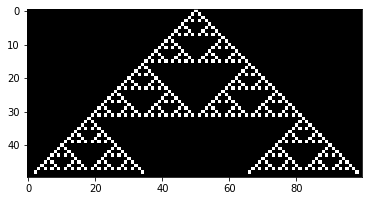

In [97]:
# In this we will be implementing a one dimensional cellular automata. It will appear to be the sierpienski triangle! 
# Note: We are laying one generation below the preceding one, so it will output a 2d grid. It is not two dimensional though!
# The output simply shows the evolution of the system over time. (The top is T=0. Time progresses downwards)
# We use standard python libraries for our plotting and data structures.
# We use alive (white) as 1 and dead (black) as 0.  
# If you are not familiar with python, try an introductory tutorial on that first
#This example shows fractal behavior arising from a 1D cellular automata. 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#Here we define the rules of transition. This will determine how the system evolves 
def transition(l,m,r):
    if(l == 1 and m==1 and r ==1):
        return 0
    elif (l == 1 and m == 1 and r==0):
        return 1
    elif (l == 1 and m == 0 and r==1):
        return 0
    elif (l == 1 and m == 0 and r==0):
        return 1
    elif (l == 0 and m == 1 and r==1):
        return 1
    elif (l == 0 and m == 1 and r==0):
        return 0
    elif (l == 0 and m == 0 and r == 1):
        return 1
    elif (l == 0 and m == 0 and r==0):
        return 0
    
#Here we apply the rules on the passed in array of cells. 
#Visualize looking at a one dimensional state (an array) and returning the next state 
def rules(cellsrow,w):
    # Use a temporary array because the transitions are based only on current states. 
    temp = np.copy(cellsrow)
    if(cellsrow.item(cellsrow.size-2)==1): #this case exists if we are going off the grid in the next iteration. Keeps viualization clean 
        return np.zeros((w,), dtype=int)
    for i in range(1, cellsrow.size - 1):
        #First look in the neighborhood. Be careful of edges! For now, we will leave them constant by changing the loop boundaries 
        l=cellsrow.item(i-1)
        m=cellsrow.item(i)
        r=cellsrow.item(i+1)
        temp[i] = transition(l,m,r)
    return temp

w=100 #experiment with this! It is the width of the grid. This visualization will run to fit it automatically. Try w = 50 and w = 500


z=np.zeros((w,), dtype=int)
cells=np.array([z])
cells.itemset(int(w/2),1)
#print(cells)
h=int(w/2) #height of our visualization. The number of generations, in other words 
for x in range (1, h):
    newrow=rules(cells[x-1,:],w)
    cells = np.append(cells,[newrow], axis=0)

#now, do the plot. 
fig = plt.figure()
#plt.grid(color='w', linestyle='-', linewidth=1) #uncomment this to show grid lines
ax = fig.add_subplot()
ax.imshow(cells, interpolation='nearest', cmap=cm.Greys_r) #Try different color maps!. Later in the tutorial, we will use fire colors
plt.show()

### Exercise
- Change the size of the grid and see how the serpinski triangle looks on a smaller scale (try w=50 and w=500; 


### 0.3: Other interesting 1D CA 
Find other patterns at https://mathworld.wolfram.com/ElementaryCellularAutomaton.html
Below we show our code adapted to rule 158 from wolfram alpha. It shows that a simple ruleset change can have drastic effects, even in the 1D case. Our code from before works, but we can change the rules and get different resulting patterns. The key idea here is that there are many patterns and rules you can try that result in interesting patterns and fractals. This is only for the one dimensional case too, so that should give you an idea of the potential that 2D CA's have to model a wide variety of phenomena. 

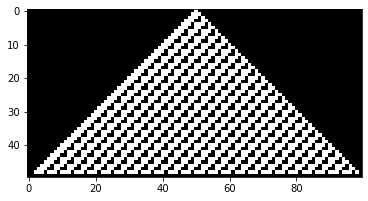

In [2]:
# In this we will be implementing a one dimensional cellular automata.  
# Note: We are laying one generation below the preceding one, so it will output a 2d grid. It is not two dimensional though!
# The output simply shows the evolution of the system over time. (The top is T=0. Time progresses downwards)
# We use standard python libraries for our plotting and data structures.
# We use alive (white) as 1 and dead (black) as 0.  (note: this is the opposite of what wolfram uses)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#Here we define the rules of transition. This will determine how the system evolves 
def transition(l,m,r):
    if(l == 1 and m==1 and r ==1):
        return 1
    elif (l == 1 and m == 1 and r==0):
        return 0
    elif (l == 1 and m == 0 and r==1):
        return 0
    elif (l == 1 and m == 0 and r==0):
        return 1
    elif (l == 0 and m == 1 and r==1):
        return 1
    elif (l == 0 and m == 1 and r==0):
        return 1
    elif (l == 0 and m == 0 and r == 1):
        return 1
    elif (l == 0 and m == 0 and r==0):
        return 0
    
#Here we apply the rules on the passed in array of cells. 
#Visualize looking at a one dimensional state (an array) and returning the next state 
def rules(cellsrow,w):
    # Use a temporary array because the transitions are based only on current states. 
    temp = np.copy(cellsrow)
    if(cellsrow.item(cellsrow.size-2)==1): #this case exists if we are going off the grid in the next iteration. Keeps viualization clean 
        return np.zeros((w,), dtype=int)
    for i in range(1, cellsrow.size - 1):
        #First look in the neighborhood. Be careful of edges! For now, we will leave them constant by changing the loop boundaries 
        l=cellsrow.item(i-1)
        m=cellsrow.item(i)
        r=cellsrow.item(i+1)
        temp[i] = transition(l,m,r)
    return temp

w=100 #experiment with this! It is the width of the grid. This visualization will run to fit it automatically. Try w = 50 and w = 500


z=np.zeros((w,), dtype=int)
cells=np.array([z])
cells.itemset(int(w/2),1)
#print(cells)
h=int(w/2) #height of our visualization. The number of generations, in other words 
for x in range (1, h):
    newrow=rules(cells[x-1,:],w)
    cells = np.append(cells,[newrow], axis=0)

#now, do the plot. 
fig = plt.figure()
#plt.grid(color='w', linestyle='-', linewidth=1) #uncomment this to show grid lines
ax = fig.add_subplot()
ax.imshow(cells, interpolation='nearest', cmap=cm.Greys_r) #Try different color maps!. Later in the tutorial, we will use fire colors
plt.show()

### Exercises
- Change the rules in the code above and rerun the code. See what happens! 
- Change the size of the grid and see how your rules look on a smaller scale (try w=50 and w=500, but you may have to change this for your cases)  


### 0.4: Conway's game of life (a 2D CA)
Now that you understand the concepts of the 1D model, it's time to up the complexity. Here we will explore our first 2D cellular automata through a classic example. In doing so you will learn the machinery needed to understand classical methods of modeling forest fires with cellular automata, that we will dive into in the next section. 

Imagine looking at a field or a forest from the top down. That will be represented as a 2D grid. As iterations continue, we will display the results on that grid. Unlike the 1D case (where we increased the dimension and plotted it over time) we will not plot the evolution over time for this, as that would require a complex 3D visualization. Instead we will animate change over time on a 2d grid. The code to do so will be presented and explained here, so that we can freely utilize in the applications section.

The code below shows a 2D cellular automata in action. I encourage you to read the code and seek further resources if anything isn't clear. 

Core concepts: 
- 2D Cellular Automata. We visualize it with an animation. 
- Similar to the 1D case, we update the value in the cell based on the value of its neighbors according to rules
- The rule set is more extensive now, as each cell has 8 neighbors. 
- We still need to watch boundary conditions! A simple solution for this is to make everything wrap around

These concepts will be tweaked in the next section to model forest fires.

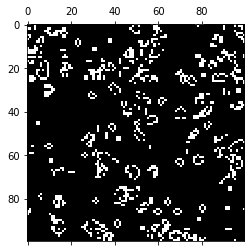

In [1]:
#Please run this code then click play on the player. Set mode to loop to see it run multiple times. 
#It functions in JupyterLab but not on github. Please contact 
#akazmi30@gatech.edu if you need to see a demo. Thank you! 

import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

N = 100 #Feel free to change this value (50 lets you see the cells more clearly)
ON = 255
OFF = 0

# populate grid with random on/off - more off than on. Also make sure it is a square grid! 
cells = np.random.choice([ON,OFF], N*N, p=[0.2, 0.8]).reshape(N, N)


#As before, this function is what takes in one state and gives us the next 
def transition(data):
  global cells
  # copy grid, similar to how we copied over the array in the 1D case
  #8 neighbors for calculation now! 
  newGrid = cells.copy()
  for i in range(N):
    for j in range(N):
      # compute 8-neghbor sum 
      # using toroidal boundary conditions - x and y wrap around 
      # so that the simulaton takes place on a toroidal surface.
      total = (cells[i, (j-1)%N] + cells[i, (j+1)%N] + 
               cells[(i-1)%N, j] + cells[(i+1)%N, j] + 
               cells[(i-1)%N, (j-1)%N] + cells[(i-1)%N, (j+1)%N] + 
               cells[(i+1)%N, (j-1)%N] + cells[(i+1)%N, (j+1)%N])/255
      # apply Conway's rules
      if cells[i, j]  == ON:
        if (total < 2) or (total > 3):
          newGrid[i, j] = OFF
      else:
        if total == 3:
          newGrid[i, j] = ON
  # update data
  mat.set_data(newGrid)
  cells = newGrid
  return [mat]

# set up animation
fig, ax = plt.subplots()
mat = ax.matshow(cells, cmap="Greys_r")
ani = animation.FuncAnimation(fig, transition, interval=50,
                              save_count=50)

#This code allows us to display the animation
#The animation has been tested to work in JupyterLab and Anaconda's Jupyter Notebooks

#When you first load the notebook you will need to run this cell (ctrl enter) to see the animation player. The image shown is the final state. 

#This will not display from within github. 
from IPython.display import HTML
HTML(ani.to_jshtml())


## 0.5: Analyzing Cellular Automata 

Due to the highly complex nature of CA's, they can be tough to analyze. 

One way to do so is a mean field approximation<sup>1</sup>, in which you make rough predictions of the behavior of the system by reducing the dimensionality of the system. It does this by assuming every cell chooses its next state independently, as a hypothetical mean field. 


Another way to do so is renormalization group analysis<sup>2</sup>, with the goal of predicting percolation thresholds. We will be using this on the forest fire models we create later on, so pay attention! 





1. Sayama Chapter 12.3 
2. Sayama Chapter 12.4 



## 0.6: Hexagonal grids 
Here we will demonstrate a different type of grid and the logic that goes into changing grids. This will give the reader enough background to progress to voronoi geometries in section 0.7. This will later help us model the fires more accurately. 

Hexagonal grids offer the simplest solution to smoothing a grid. Each hexagon is adjacent to hexagons with shared edges, instead of shared vertices as with the 8-neighbor square grid. As such, each cell has 6 neighors instead of 8. Also notice that although each cell has fewer neighbors, a cell's neighbors are all equidistant from itself. 

Although the code is significantly longer, this approach isn't more computationally expensive than an 8-neighbor square grid.

This example will take advantage of matplotlib's hexbin function, which allows for easy plotting of hexagonal grids. However, its function signature operates quite differently from matplotlib.imshow. 

matplotlib.pyplot.hexbin(x, y, C, gridsize)

x - array of the x coordinates of hexagons

y - array of the y coordinates of the hexagons

C - array of hexagon states. For example, C[i] 
    corresponds to the state of the grid at 
    (x[i], y[i])
    
gridsize - tuple of the number of hexagons in the x and y direction  

This example is going to show a wave propagating through the grid network, which requires maintaining
two key variables of each hexagon: its state and its cooldown. In order for a wave to properly propagate,
it must have some sort of delay before it can activate again, which will be referred to as its cooldown. A hexagon
can only activate once its cooldown time has decremented to zero. For example, if a hexagon has a cooldown time
of 5, it can only activate again once 5 frames have passed since the previous activation. In this way, the waves 
propagate outwards without propagating back inwards. 

In [13]:
#This cell is setup, and the next is the actual animation. 
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.animation as animation

# This function generates the positions of the hexagons for the hexagonal grid.
# Every even row has grid_width number of hexagons, and every odd row has
# grid_width - 1 hexagons. The odd rows are offset from the even rows by 
# half the width of a hexagon, because that's how geometry works. 
def gen_hex_grid(grid_width):
    grid_width = grid_width if grid_width % 2 == 1 else grid_width + 1
    start = -grid_width / 2.0 + 1 / 2
    end = grid_width / 2 - 1/2
    
    x_even = np.linspace(start, end, grid_width)
    x_odd = np.linspace(start + 1/2, end - 1/2, grid_width - 1)
    
    y_values = np.linspace(start, end, grid_width)
    
    x = []
    y = []
    
    for i in range(grid_width):
        curr_y = y_values[i]
        if (i % 2 == 0) :
            x += list(x_even)
            y += [curr_y for j in range(grid_width)]
        else:
            x += list(x_odd)
            y += [curr_y for j in range(grid_width - 1)]
        
    plot_hex(x,y)
    return x, y

# This function plots the hexagonal grid for your viewing pleasure
def plot_hex(x, y):
    C = [i for i in range(len(x))]
    
    fig, ax = plt.subplots(figsize = (6,6))
    ax.set_ylim(-grid_width / 2 - 1, grid_width / 2 + 1)
    ax.set_xlim(-grid_width / 2 - 1, grid_width / 2 + 1)
    mat = ax.hexbin(x, y, C = C, gridsize = (grid_width - 1, int(grid_width / 2)))
    plt.show()
    
# This function  determines which hexagons are adjacent to one another.
# The logic looks really gross just because it has to account for
# the edges of the grid, and because the logic is different for even and odd rows
# I think this structure does a few more comparisons than is necessary,
# but its a little more readable this way
def gen_hex_adj_dict(grid_width):
    grid_width = grid_width if grid_width % 2 == 1 else grid_width + 1 
    index = 0
    adj_dict = {}
    
    for y in range(grid_width):
        # whether the hexagon is on an even or odd row
        even_row = y % 2 == 0 

        # the number of hexagons in the current row
        x_count = grid_width if even_row else grid_width - 1

        # whether the hexagon is on a y-axis edge
        bottom_edge = y == 0
        top_edge = y == grid_width - 1
        
        for x in range(x_count):
            # whether the hexagon is on an x-axis edge
            left_edge = x == 0
            right_edge = x == x_count - 1 
            
            # the indices of a hexagon's spatially 
            # adjacent hexagons, if they exist
            right_hex = index + 1
            left_hex = index - 1
            upper_right = index + grid_width
            upper_left = index + grid_width - 1
            lower_right = index - grid_width
            lower_left = index - grid_width + 1
           
            adj_dict[index] = []
            
            # logic for adjacency to the right
            if not right_edge: 
                adj_dict[index].append(right_hex)
                
            # logic for adjacency to the left
            if not left_edge:
                adj_dict[index].append(left_hex)
                
            # logic for the y-axis adjacency of even rows
            if even_row:
                if not top_edge:
                    if not right_edge:
                        adj_dict[index].append(upper_right)
                    if not left_edge: 
                        adj_dict[index].append(upper_left)
                if not bottom_edge:
                    if not left_edge: 
                        adj_dict[index].append(lower_right)
                    if not right_edge:
                        adj_dict[index].append(lower_left)
                
            # logic for the y-axis adjacency of odd rows
            else: 
                if not top_edge:
                    adj_dict[index].append(upper_right)
                    adj_dict[index].append(upper_left)
                if not bottom_edge:
                    adj_dict[index].append(lower_right)
                    adj_dict[index].append(lower_left)
            
            index += 1
    return adj_dict
    

# these are the parameters for the animation!

# a couple notes:
# - grid_width must be odd, because of the way
#   hexbin treats the center of each hexagon
#
# - if delay is less than 3, back propogation will occur. Try it!
#
# - beat_rate = (grid_width + delay) will guarantee that 
#   each wave won't be interferred with. Changing it 
#   to small value (< 10) leads to some really interesting animations!
#
# - feel free to change the seed hexagon


grid_width = 17 # number of hexagons in each axis
delay = 3 # cooldown time of each hexagon
beat_rate = (grid_width + delay) # how often a new wave is initiated
seed = int(.5 * grid_width ** 2) # the starting hexagon

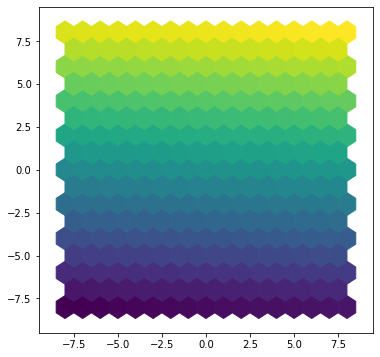

In [14]:
#After running this cell there will be one image with a picture of the grid colorized. 
#When you wait for the animation to load, a second player will pop up and then you can click play to see a propagation
ON = 255
OFF = 0

adj_dict = gen_hex_adj_dict(grid_width)
x, y = gen_hex_grid(grid_width)
hex_count = len(x)

hex_state = [OFF for i in range(hex_count)]
hex_cooldown= {i : 0 for i in range(hex_count)}


def init():
    hex_cooldown[seed] = delay
    hex_state[seed] = ON
    return ax.hexbin(x, y, C = hex_state, gridsize = (grid_width - 1, int(grid_width / 2)), cmap = "summer")
        
def update(data):
    
    # decrements the cooldown of all hexagons by one
    for hexagon in hex_cooldown:
        if hex_cooldown[hexagon] > 0:
            hex_cooldown[hexagon] -= 1
    
    # creates a snap shot of the current state
    # and uses it to compute the next state
    hex_state_copy = hex_state.copy()
    for hexagon in range(hex_count):
        
        # if a hexagon has been activated
        if hex_state_copy[hexagon] == ON:            
            # activate its neighbors, if they aren't cooling down
            for neighbor in adj_dict[hexagon]:
                if hex_cooldown[neighbor] == 0: 
                    hex_cooldown[neighbor] = delay
                    hex_state[neighbor] = ON
            # deactivate that hexagon
            hex_state[hexagon] = OFF
    
    # reignites a random hexagon one every beat_rate frames
    if (data + 1) % beat_rate == 0:
        beat_hex = int(random.random() * hex_count)
        hex_state[beat_hex] = ON
        hex_cooldown[beat_hex] = delay

    # Completely recreates the plot with each frame.
    # It isn't possible to simply redraw the plot because
    # hexbin doesn't support that functionality
    return  ax.hexbin(x, y, C = hex_state, gridsize = (grid_width - 1, int(grid_width / 2)), cmap = "summer")

fig, ax = plt.subplots(figsize = (6,6))
ax.set_ylim(-grid_width / 2 - 1, grid_width / 2 + 1)
ax.set_xlim(-grid_width / 2 - 1, grid_width / 2 + 1)
mat = ax.hexbin(x, y, C = hex_state, gridsize = (grid_width - 1, int(grid_width / 2)), cmap = "summer")
ani = animation.FuncAnimation(fig, update, interval = 50, save_count = 50, init_func = init)
plt.close(fig)

from IPython.display import HTML
HTML(ani.to_jshtml())

### Notes on results

You'll immediately notice that these waves are hexagonal. It is slightly better than square waves, but still decidedly undesireable. For this reason, we will not use these to model forest fires for the sake of brevity, instead using a better geometry that we are about to present (voroni).  

I know the massively longer code is offputting, but it really isn't that much harder in terms of brain power, and it isn't any harder in terms of computational power.

### Exercises 
- Try decreasing delay to a value of 2 and to a value of 1. Just because its fun.
- Scroll up to gen_adj_dict. Try modifying the even_row boolean and see how the waves propagate differently! (Note that changing the other booleans will result in an out of bounds error, but you can modify the logic accordingly if desired)

## 0.7: Voronoi Grids

Voronoi grids offer a structure that is somewhat organic and disordered at the cost of computational complexity. 

Voronoi grids are created by first distributing a number of nodes randomly across a plane. Points on the plane are now defined by whichever node is closest to it, and the size and shape of each cell is irregular because the nodes were distributed randomly. Adjacencies are much more random, and anything propagating through the grid no longer does so uniformly. This irregularity comes with a number of advantages and disadvantages.

Remember that in the hexagonal grid, waves propagated hexagonally; in a voronoi grid, the irregular shape of each cell results in a more smoothed propagation pattern. However, this irregular shape also means that cells are not a uniform distance apart from each other. Physical distance in the grid is no longer strictly related to the number of iterations it will take for a signal to propagate between two points. As a result, self exciting loops can form relatively easily (which are really cool!). Self exciting loops are any situation where a signal in the network can loop back onto the original source node and cause the same signal to propagate once more. These loops can be undesireable, and are generally much more difficult to create with ordered networks, unless you are deliberately attempting to create one. 

The creation of the network is also computationally expensive, particularly with this approach. This voronoi mapping method is rasterized, which means that space has been discretized. The closest node is computed for each discretized point in the grid. This is perhaps the most inefficient way to implement a voronoi grid. There are much more elegant ways to compute voronoi structure using convex hull algorithms. However, this method was chosen because it plays nicely with matplotlib's existing plotting functions and is relatively simple to code. Once the grid is created and adjacencies are computed, any algorithms run with the same speed as with an ordered grid. 

Let's take a look at this example of a wave propagating through a voronoi grid. The steps for the algorithm are as follows:

1. Randomly distribute nodes throughout a plane. The number of nodes is defined by 'cell_count'

2. Calculate the closest node for each discrete point in the plane. The level of resolution of these discrete points is defined by 'grid_resolution'

3. Determines which cells are adjacent to one another by iterating over the grid in the x and y direction and documenting when a cell change occurs

3. Activate a single cell in the grid. With each iteration, all activated cells activate their adjacent cells. When cells are turned off, they are placed on a short cooldown before they can activate again. This delay is defined by 'delay'

4. Every few frames, a random cell is activated, and another wave propagates through the system. The number of frames between activation is 'beat_rate'



In [7]:
#This cell sets up the methods we need for the voroni grid
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.animation as animation

# finds the closest node from a certain position
def closest_node(position, nodes):
    diff = np.subtract(nodes, position)
    
    errors = np.sum(np.square(diff), axis = 1)
    closest = np.argmin(errors)
    
    return nodes[closest], closest

# Creates a Voronoi grid
#
# Returns a matrix of grid_resolution x grid_resolution. Each value 
# in this matrix refers to whichever node was closest to 
# that point on the grid. For example, all entries in the matrix
# whose value is 18 are a part of the same voronoi cell
def voronoi_mapping(grid_resolution, cell_count):  
    
    nodes = []
    random.seed(1373)
    for i in range(cell_count):
        # creates a node at a random location
        curr_x = random.random()
        curr_y = random.random()
        curr_node = (curr_x, curr_y)
        nodes.append(curr_node)
        
    # iterates over a square grid whose resolution is grid_resolution.
    # At each point in the grid, determines which node is closest
    axis = np.linspace(0, 1, grid_resolution, endpoint = False)
    voronoi_map = []
    for x in axis:
        temp_map = []
        for y in axis:
            curr_position = [x, y]
            voro_node, node_index = closest_node(curr_position, nodes)
            temp_map.append(node_index)
            
        voronoi_map.append(temp_map)
        
    return voronoi_map, nodes
            
    
# creates a dictionary of a cell's adjacencies
# For example, if cell 0 is adjacent to cell 4, 9, and 21,
# the entry adj_dict[0] would be equal to [4, 9, 21]
def gen_adj_dict(voronoi_map, nodes):
    grid_resolution = len(voronoi_map)
    cell_count = len(nodes)
    
    # each cell's adjacencies are stored in a set
    adj_dict = {i : set() for i in range(cell_count)}
    
    # iterates over the map in the y direction
    # detects when a change in cells occurs, and 
    # documents that as an adjacency
    prev = voronoi_map[0][0]
    for x in range(grid_resolution): # for every x value
        prev_node = voronoi_map[x][0]
        for y in range(grid_resolution): # iterates in the y direction
            curr_node = voronoi_map[x][y]
            if curr_node != prev_node: # detects changes in the closest node
                adj_dict[curr_node].add(prev_node)
                adj_dict[prev_node].add(curr_node)
            prev_node = curr_node
            
    for y in range(grid_resolution): # for every y value
        prev_node = voronoi_map[0][y]
        for x in range(grid_resolution): # iterates in the x direction
            curr_node = voronoi_map[x][y]
            if curr_node != prev_node: # detects changes in the closest node
                adj_dict[curr_node].add(prev_node)
                adj_dict[prev_node].add(curr_node)
            prev_node = curr_node
            
    return adj_dict

# Updates the plot for the current iteration, so that 
# the renderer knows what to animate
def update_voronoi_plot(voronoi_map, node_state):
    grid_resolution = len(voronoi_map)
    plot_grid = np.zeros((grid_resolution, grid_resolution))
    
    for x in range(grid_resolution):
        for y in range(grid_resolution):
            curr_node = voronoi_map[x][y]
            plot_grid[x][y] = node_state[curr_node]
                
    return plot_grid

# plots the voronoi map for your viewing pleasure
def plot_voronoi(voronoi_map, grid_resolution):
    heatmap = np.empty((grid_resolution, grid_resolution))
    for x in range(grid_resolution):
        for y in range(grid_resolution):
            heatmap[x][y] = voronoi_map[x][y]
            
    plt.figure(figsize = (8,8))
    plt.imshow(heatmap, cmap = "RdBu")
    plt.show()

# Animation parameters!
#
# Some notes:
# - voronoi_mapping is horribly inefficient, and has 
#   O(grid_resolution^2 * cell_count)
#
# - A good number for cell_count is typically 1 - 6 times grid_resolution
#
# - grid_resolution should be greater than 100 to properly see the waves, but I
#   recommend using a value around 400 or more
#
# - because of the structure of the system, self-exciting loops can happen when 
#   the delay of one wave interferes with the propagation of the next! There's a 
#   list of parameters at the bottom of this cell you can try if you're interested.
#   Fun fact, this is the same mechanism that causes heart attacks.



grid_resolution = 400 # resolution of the grid across each axis
cell_count = 800 # the number of voronoi cells
delay = 5 # cooldown time of each cell
beat_rate = 25 # how often a new wave is initiated
seed_node = 0 # the starting cell


# Self-exciting loop parameters
# grid_resolution = 400
# cell_count = 800
# delay = 5
# beat_rate = 20
# seed_node = 0

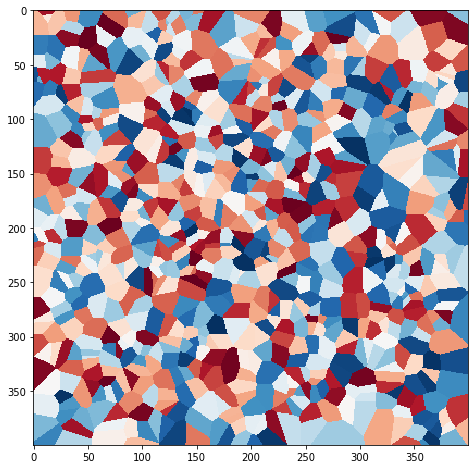

In [8]:
# this step can take a long time to run, so its in its own cell. Only run this
# if you have changed grid_resolution or cell_count
#
# For reference, with the default values of 400 and 800, this cell takes around 
# a minute to run on my computer
#The output you see is the grid that we will be working on, colorized for easy viewing. It's more complicated than a grid! 
voronoi_map, nodes = voronoi_mapping(grid_resolution, cell_count)
adj_dict = gen_adj_dict(voronoi_map, nodes)
plot_voronoi(voronoi_map, grid_resolution)

In [9]:
#Running this cell will result in a player showing a propagation through the grid
# Watch the animation and see the unusual patterns: we will later exploit this for modeling purposes
ON = 255
OFF = 0
random.seed(1373)

node_cooldown = {i : 0 for i in range(cell_count)}
node_state = {i : OFF for i in range(cell_count)}

# this init function looks useless, but for some reason,
# the renderer starts on frame 3 without it. With this
# function, it starts on frame 2
def init():
    return mat

def transition(data):
    
    # decrements the cooldown of each node by one
    for node in node_cooldown:
        if node_cooldown[node] > 0:
            node_cooldown[node] -= 1
    
    node_state_copy = node_state.copy()
    for node in node_state.keys():
        
        # if a node is activated
        if node_state_copy[node] == ON:
            # activate its neighbors, if they aren't cooling down
            for neighbor in adj_dict[node]:
                if node_cooldown[neighbor] == 0:
                    node_cooldown[neighbor] = delay
                    node_state[neighbor] = ON
            # deactivate that node
            node_state[node] = OFF

    
     # reignites a random node one every beat_rate frames
    if (data + 1) % beat_rate == 0:
        beat_seed = int(random.random() * cell_count)
        node_state[beat_seed] = ON
        node_cooldown[beat_seed] = delay
        
    plot_grid = update_voronoi_plot(voronoi_map, node_state)
    
    # updates the plot's data, allowing the renderer to redraw the plot
    mat.set_data(plot_grid)

    return mat

node_state[seed_node] = ON
node_cooldown[seed_node] = delay
plot_grid = update_voronoi_plot(voronoi_map, node_state)

fig, ax = plt.subplots(figsize = (6,6))
mat = ax.matshow(plot_grid, cmap="plasma")
ani = animation.FuncAnimation(fig, transition, interval = 50, save_count=50, init_func = init)
plt.close(fig)

from IPython.display import HTML
HTML(ani.to_jshtml())

### Notes on Results:
Notice that the waves in the voronoi grid are comparatively smoothed and circular in comparsion to the hexagonal grid!
The fact that voronoi grids can create self-exciting networks is generally an issue. However, there are applications where such behavior is desired, such as research into heart dynamics. This is a real thing, check out Dr. Flavio Fenton's research here at Georgia Tech for more information into the chaotic nature of waves in hearts.

## 0.8: CA's within Theoretical Computer Science

As you have seen, CA's are discrete abstract computational systems. To cut to the chase, with suitable rules CA's can emulate a Universal Turing Machine. 

In 2002, P. Chapman made a game of life pattern that implements the action of a universal register machine, thus explicity proving game of life to be unversal! Also in 2002, Wolfram showed that even one dimensional cellular automata can be unversal with the right rules! 

The reason CA's being a Universal Turing Machine matters is due to the Church Turing thesis, which (to speak informally) states that every effective computation can be carried out by a turing machine. The thesis is often misunderstood, as the definition of "effective methods" can be complex. If you are interested, I would highly recommend the articles cited below as a gateway to learning more about the theoretical impacts of Cellular Automata. A key point to note is that this is a thesis that has not been formally proved, but is valid for every model of computation yet discovered. 

To be clear, it would be horribly inefficient to use these for serious computational purposes, but from a theoretical standpoint it has ramifications. It's interesting to think that we could use CA's to compute things! 

This tutorial will be focusing on the applications of CA's to forest fires, but because this is an introductory cellular automata tutorial the theoretical aspect deserved a mention. 

The material in this section is heavily based off material from the following articles, cited below. 

https://plato.stanford.edu/entries/cellular-automata/

https://plato.stanford.edu/entries/church-turing/

https://mathworld.wolfram.com/Church-TuringThesis.html

https://mathworld.wolfram.com/UniversalCellularAutomaton.html

https://mathworld.wolfram.com/GameofLife.html

https://mathworld.wolfram.com/Rule110.html




## 1: Applications to Forest Fires
### 1.1: A simple CA model for forest fires
In a paper from 2006, some simple rules were devised to model forest fires. Here we will present those ideas and show them in action. https://bib.irb.hr/datoteka/278897.Ljiljana_Bodrozic_ceepus2006_2.pdf 

As per the paper, we will use the following possible states. Before we only had two states (1 and 0), but now we will introduce more states to enable more accurate modeling. 
- 0: can be ignited
- 1: fire growing
- 2: burnt
- 3: burning

The rules for this simulation are the following: 
- An ignitable cell remains ignitable unless at least one neighbor is burning (in which case it is burning in the next step)
- A burning cell becomes a burnt cell in the next step.
- A burnt cell becomes a growing cell in the next step.
- A growing cell becomes ignitable in the next step.

This paper uses a 2D cellular automata, which builds off the core ideas of the game of life. We can expand that code by editing the rules and increasing the number of states. Because we are now modeling a fire, a color scheme change will be a nice bonus! Also, the initial state matters more now, as it is more realistic for a forest to have clumps of ignitable trees and a single source of the fire, so we will define a different seed. 

In [1]:
#This is a stochastic model! 
# these variables influence the rate at which the system progresses
# You can tweak these probabilities to create some really cool 
# effects. Try lowering BURNOUT_CHANCE or raising REGROW_ALONE_CHANCE
# to create a self exciting system!

FIRE_SPREAD_CHANCE = .5
BURNOUT_CHANCE = .6
REGROW_ALONE_CHANCE =.03
REGROW_NEIGHBOR_CHANCE = .1
FULLY_REGROW_CHANCE = .05

In [2]:
#Please run this code then click play on the player. Set mode to loop to see it run multiple times. 
#It functions in JupyterLab but not on github. Please contact 
#akazmi30@gatech.edu if you need to see a demo. Thank you! 

import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
import random

N = 100 #Feel free to change this value (50 lets you see the cells more clearly)

# Define states. These influence the color of each state.
# Larger numbers mean brighter colors

ON = 300 # on is burning 
BURNT = 200 # burnt is not actively recovering
GROWING= 100 # is recovering 
OFF = 0 # can be ignited

random.seed(1379)

#let's start a fire... (3 lines of fire essentially) 
cells = np.zeros((N, N)).reshape(N, N)
for x in range (1, 30):
    cells.itemset((x, x), ON)
    cells.itemset((2 * x, int(x / 2)), ON)
    cells.itemset((3 * x, int(x / 2)), ON)
    
adj_dict = {}
for x in range(N):
    for y in range(N):
        adj_dict[(x,y)] = [(x - 1, y - 1), (x - 1, y), (x - 1, y + 1),
                          (x, y - 1), (x, y + 1),
                          (x + 1, y - 1), (x + 1, y), (x + 1, y + 1)]

#As before, this function is what takes in one state and gives us the next 
def transition(data):
    global cells
    newGrid = cells.copy()
        
    # this ugly hunk of logic just runs through
    # all the possible states of each hexagon, 
    # and updates its state accordingly
    for x in range(1, N - 1):
        for y in range(1, N - 1):
            curr_state = cells[x][y]
            if curr_state == ON: 
                for neighbor in adj_dict[(x, y)]:
                    if newGrid[neighbor] == OFF and random.random() < FIRE_SPREAD_CHANCE:
                        newGrid[neighbor] = ON
                if random.random() < BURNOUT_CHANCE:
                    newGrid[x][y] = BURNT
            elif curr_state == BURNT and random.random() < REGROW_ALONE_CHANCE:
                newGrid[x][y] = GROWING
            elif curr_state == GROWING:
                for neighbor in adj_dict[(x, y)]:
                    if newGrid[neighbor] == BURNT and random.random() < REGROW_NEIGHBOR_CHANCE:
                        newGrid[neighbor] = GROWING
                if random.random() < FULLY_REGROW_CHANCE:
                    newGrid[x][y] = OFF
        
    cells = newGrid
        
    # update data
    mat.set_data(newGrid)
    cells = newGrid
    return [mat]

# set up animation
fig, ax = plt.subplots(figsize = (6,6))
mat = ax.matshow(cells, cmap="RdYlGn_r")
ani = animation.FuncAnimation(fig, transition, interval=50,
                              save_count=50)
plt.close(fig)
#This code allows us to display the animation
#The animation has been tested to work in JupyterLab and Anaconda's Jupyter Notebooks

#When you first load the notebook you will need to run this cell (ctrl enter) to see the animation player. The image shown is the final state. 

#This will not display from within github.
from IPython.display import HTML
HTML(ani.to_jshtml())

### 1.2: Analysis of our model 
Cellular Automata may be easy to look at, but they are a representation of high dimensional data. Mathamatical analysis of it can be tough, but here we will present some common methods. 

We recommend reading Chapter 12 of 'Introduction to the Modeling and Analysis of Complex Systems' by Sayama for a detailed overview of these methods. 

The number of possible state transitions can be determined as follows: 

- D=dimension of space (for us, always 2) 
- r = radius of neighborhood (for now, 1. This is called Moore Neighborhoods) 
- n= volume of a neighborhood. n = (2r+1)<sup>D</sup>
- m = number of local situations = k<sup>n</sup>. For our case, this is 4<sup>9</sup>
- k = number of states (for the model above, 4) 

The number of possible mappings is given by k<sup>M</sup>

So, for the model above there are 4<sup>4<sup>9</sup></sup> possible mappings. That's a massive number. 256<sup>9</sup> is too big for a calculator to hold. Our model might look pretty, but it has some serious data in it, and its amazing we can make visual sense of it! 
    
### Exercises: 
- Read sayama 12.3, and think of a way you would use mean field analysis to analyze the situation above. This makes a one dimensional nonlinear iterative map. Proceed to analyze that map using a cobweb plot.  
- For mathematically advanced readers: read Sayama 12.4 and attempt a renormalization group analysis to predict percolation thresholds. The percolation threshold is a critical threshold for percolation to occur in spatial processes, like the fire we have here. This method is commonly used in Quantum and Statistical physics, and it's a beyond the scope of our tutorial.


### 1.3: Stochastic Hexagonal grid model
As before, we will use a hexagonal grid for our CA. This time, there is a stochastic element to better mimic real fires, and a more realistic starting grad that would occur in a real life scenario. 

Another method of smoothing waves is to make their propagation stochastic. Because the conditions for a wave to propagate are more relaxed, the wave edge is less well defined, and is slightly smoothed. Here, we've added a random chance for nodes to transition between states, even when they meet the prerequisites eg. a neighbor is on fire. The fire spread is seperated into 4 steps:

Catching on fire: when a neighbor is on fire, a grid space has a FIRE_SPREAD_CHANCE liklihood to catch on fire as well
Burning out: while on fire, a grid space has a BURNOUT_CHANCE liklihood to be extinguished and burnt
Recovering: if a grid space is burnt, but doesn't have any recovering neighbors, it has a REGROW_ALONE_CHANCE liklihood to begin recovering. If it has a recovering neighbor, it instead has a REGROW_NEIGHBOR_CHANCE liklihood of beginning to recover
Fully recovered: if a grid space is recovering, it has a FULLY_REGROW_CHANCE likelihood of becoming reigniteable

In [16]:
# These are parameters you can change! I personally think these look nice,
# but feel free to play with them

grid_width = 51
seed_hex = int((1 / 2) * grid_width ** 2)

# these variables are defined in the cell above, and 
# influence the rate at which the system progresses
#
# You can tweak these probabilities to create some really cool 
# effects. Try lowering BURNOUT_CHANCE or raising REGROW_ALONE_CHANCE
# to create a self exciting system!

FIRE_SPREAD_CHANCE = .5
BURNOUT_CHANCE = .6
REGROW_ALONE_CHANCE =.03
REGROW_NEIGHBOR_CHANCE = .1
FULLY_REGROW_CHANCE = .05

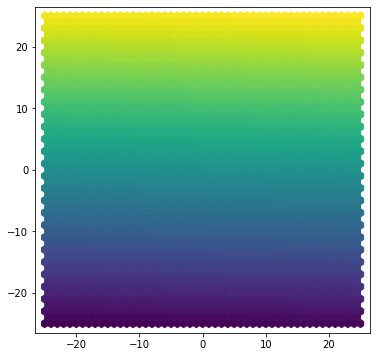

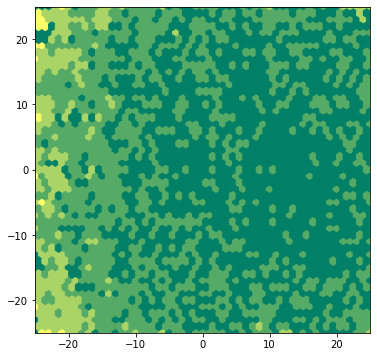

In [17]:
#Run this cell for a stochastic fire model using a hexagonal grid
# Define states. These influence the color of each state.
# Larger numbers mean brighter colors

ON = 300 # on is burning 
BURNT = 200 # burnt is not actively recovering
GROWING= 100 # is recovering 
OFF = 0 # can be ignited

random.seed(1379)

# these variable are covered in depth in the Complex Geometry section
# in short terms, they represent the grid, and which
# hexagons are adjacent to one another
adj_dict = gen_hex_adj_dict(grid_width)
x, y = gen_hex_grid(grid_width)
hex_count = len(x)
hex_state_global = [OFF for i in range(hex_count)]


def transition(data):

    global hex_state_global
    hex_state = hex_state_global.copy()
        
    # this ugly hunk of logic just runs through
    # all the possible states of each hexagon, 
    # and updates its state accordingly
    for i in range(hex_count):
        curr_state = hex_state_global[i]
        if curr_state == ON: 
            for neighbor in adj_dict[i]:
                if hex_state[neighbor] == OFF and random.random() < FIRE_SPREAD_CHANCE:
                    hex_state[neighbor] = ON
            if random.random() < BURNOUT_CHANCE:
                hex_state[i] = BURNT
        elif curr_state == BURNT and random.random() < REGROW_ALONE_CHANCE:
            hex_state[i] = GROWING
        elif curr_state == GROWING:
            for neighbor in adj_dict[i]:
                if hex_state[neighbor] == BURNT and random.random() < REGROW_NEIGHBOR_CHANCE:
                    hex_state[neighbor] = GROWING
            if random.random() < FULLY_REGROW_CHANCE:
                hex_state[i] = OFF
        
    hex_state_global = hex_state
    
    # these two random states are here so that
    # the colors in the animation stay normalized.
    # They do properly affect their neighbors, they just 
    # don't show it in the animation
    hex_state[0] = OFF - 1
    hex_state[1] = ON + 1
    
    return ax.hexbin(x, y, C = hex_state, gridsize = (grid_width - 1, int(grid_width / 2)), cmap = "summer")

hex_state_global[seed_hex] = ON
fig, ax = plt.subplots(figsize = (6,6))
mat = ax.hexbin(x, y, C = hex_state_global, gridsize = (grid_width - 1, int(grid_width / 2)), cmap = "summer")
ani = animation.FuncAnimation(fig, transition, interval=50,
                              save_count=50)

#The thing you see if you are on github is just the final state. Run the cells in a jupyter notebook for proper animations 
from IPython.display import HTML
HTML(ani.to_jshtml())

### 1.4: Stochastic Voronoi grid model
Now, we'll continue building on the techniques introduced previously by using a stochastic voronoi grid model. By now, hopefully that makes sense! 


In [4]:
# You can tweak these probabilities to create some really cool 
# effects! Try lowering BURNOUT_CHANCE or raising REGROW_ALONE_CHANCE
# to create a self exciting system

FIRE_SPREAD_CHANCE = .6
BURNOUT_CHANCE = .4
REGROW_ALONE_CHANCE =.02
REGROW_NEIGHBOR_CHANCE = .1
FULLY_REGROW_CHANCE = .05

In [5]:
# Animation parameters!
#
# Some notes:
# - voronoi_mapping is horribly inefficient, and has 
#   O(grid_resolution^2 * cell_count)
#
# - A good number for cell_count is typically 1 - 6 times grid_resolution
#
# - grid_resolution should be greater than 100 to properly see the waves, but I
#   recommend using a value around 400 or more
#
# - because of the structure of the system, self-exciting loops can happen when 
#   the delay of one wave interferes with the propagation of the next! There's a 
#   list of parameters at the bottom of the next cell you can try if you're interested.
#   Fun fact, a very similar mechanism is what causes heart attacks.



grid_resolution = 400 # resolution of the grid across each axis
cell_count = 800 # the number of voronoi cells
delay = 5 # cooldown time of each cell
beat_rate = 25 # how often a new wave is initiated
seed_node = 0 # the starting cell

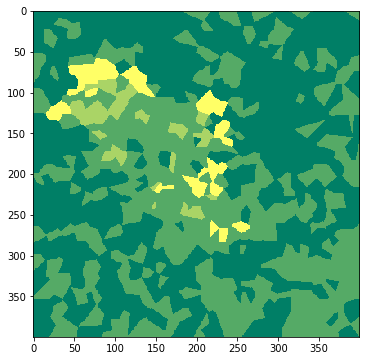

In [11]:
# Define states. These influence the color of each state.
# Larger numbers mean brighter colors

ON = 300 # on is burning 
BURNT = 200 # burnt is not actively recovering
GROWING= 100 # is recovering 
OFF = 0 # can be ignited

random.seed(1379)

node_state_global = [OFF for i in range(cell_count)]
        
def transition(data):
    
    global node_state_global
    node_state = node_state_global.copy()
        
    # this ugly hunk of logic just runs through
    # all the possible states of each node 
    # and updates its state accordingly
    for i in range(cell_count):
        curr_state = node_state_global[i]
        if curr_state == ON:
            for neighbor in adj_dict[i]:
                if node_state[neighbor] == OFF and random.random() < FIRE_SPREAD_CHANCE:
                    node_state[neighbor] = ON
            if random.random() < BURNOUT_CHANCE:
                node_state[i] = BURNT
        elif curr_state == BURNT and random.random() < REGROW_ALONE_CHANCE:
            node_state[i] = GROWING
        elif curr_state == GROWING:
            for neighbor in adj_dict[i]:
                if node_state[neighbor] == BURNT and random.random() < REGROW_NEIGHBOR_CHANCE:
                    node_state[neighbor] = GROWING
            if random.random() < FULLY_REGROW_CHANCE:
                node_state[i] = OFF

        
    # update data
    node_state_global = node_state
    plot_grid = update_voronoi_plot(voronoi_map, node_state)
    mat.set_data(plot_grid)
    return mat

node_state_global[0] = ON
plot_grid = update_voronoi_plot(voronoi_map, node_state_global)
fig, ax = plt.subplots(figsize = (6,6))
mat = ax.imshow(plot_grid, cmap = "summer")
ani = animation.FuncAnimation(fig, transition, interval=50,
                              save_count=50)



from IPython.display import HTML
HTML(ani.to_jshtml())

### Results 
As you can see, the stochastic voronoi model looks a lot like we would expect a real fire to. It spreads gradually, leaving burnt ground and in certain cases has patches reignite in the wake of the main fire. This is with a relatively small grid size, too!

Exercise: modify the fire spread chance to make it spread less and rerun the animation. What would you expect to happen? Does our simulation match that? (For those just reading along, yes it matches)

### Exercises 
Note: these are tougher than before, but still insightful to think about!
- Given the Hexagonal grid above, calculate the number of possible state transition functons) 
- Given the Voronoi grid above, calculate the number of possible state transition functons)
- Self exciting loops: As mentioned, self-exciting loops can occur pretty easily in a voronoi grid. In a binary system like this, the most common cause of these loops is when one wave interferes with the propagation of the next wave. Try out the following parameters to see a self-exciting loop in action! Notice that the delay from the first wave stops the second wave from fully igniting, causing it to form a loop. In a heart beat, this same effect can occur when a portion of tissue stops carrying a signal, causing the surrounding signal to wrap around the damaged tissue, changing the trajectory of the wave. This causes a special type of self-exciting loop called spiral waves. Try changing beat rate and delay to see which ratio of parameters most readily creates self-exciting loops.

Self-exciting loop parameters:
 - grid_resolution = 400
 - cell_count = 800
 - delay = 5
 - beat_rate = 20
 - seed_node = 0

### 1.5 Concluding Thoughts 
The techniques presented are by no means the state of the art, and there are many other approaches for using Cellular Automata to model forest fires. 

You should now read the literature review covered in section 2 of this tutorial, which contains an overview of modern CA methods for forest fires. After that, you will be ready to read relevant research papers yourself. 

What you learned here is transferable to more than just forest fires though! Below is a list of further reading and areas to explore. 

Further reading: 
- Research other applications of Cellular Automata, as there are many that build on what you learned here. (biological systems, virus spread, fluid dynamics) 
- Dive deeper into the theory of Cellular Automata, which has implications in Theoretical CS and Philosophy 
- Another direction for your learning would be to learn other modeling techniques, but that is beyond the scope of this tutorial 

## 2: Literature Review
Currently, many methods have been attempted to model forest fires. Many different models have been attempted, but here I will focus on cellular automata based studies. The method presented above can be considered almost naive to current techniques. 

Traditional studies have focused on creating rule based Cellular Automata based on scientific principles. For instance, a study from 2006 focused on predicting the spread of the fires based on the transfer of fractional burned area, with factors of propagation from diagonal neighbor cells and a rate for the spread of fire<sup>1</sup>. One 2016 paper<sup>3</sup> outlines common rules and provides a Cellular Automata simulator for Forest Fires. These are essentially more detailed versions of what we presented in section 1 of this tutorial. 

One common method of adding complexity is to add additional geometry to the grid itself. A 2004 study<sup>2</sup> focused on using the same fire spread realtionships (developed by Rothermel in 1972) but on a hexagonal grid instead of a square one. Similarly, a 2006 paper <sup>7</sup>utilized voronoi patterning in order to maintain rigid cellular boundaries while simultaneously giving each cell boundaries organic structure. Others simply choose to extend the influence of each cell to its second order neighbors, therefore being affected by the adjacent 24 cells instead of simply its immediate 8 neighbors.  
    
There also exists a dramatic distinction between the usefulness of vector based model and raster based models. Previously mentioned models are all raster based; a cell has a state represented by a scalar and the states of its neighbors are uniformly influence by that state. Vector based approaches add a layer of complexity in that the propogation and state of the system is represented by a vector, thereby giving the system directionality and momentum. A cell's neighbors need not be influenced uniformly by the state of the cell. However, this adds significant computational complexity. Vector based approaches are valuable on small scale systems, as raster based approaches will create distortions as a result of the discretized geometry of the system, while raster based approaches will more smoothly simulate fire spread on these small scales <sup>8<\sup>   

A more recent paper<sup>4</sup> used a data driven approach to cellular automata. This model was actually tested using data collected from five fires in the United States, and achieved high levels of accuracy in simulating the spread of the fires. What was really unique about this study though was that instead of focusing on defining every aspect of the transition rules as usually done in a Cellular Automaton model it used a feedforward neural network known as the "Extreme Learning Machine." The ELM performed well in predicting each cell's igniting probability. It also was able to account for the impact of vind velocity on the fire spreading pattern. The ELM was integrated with the CA model because a rule based transition system was still implemented, but each iteration the ELM created the transition rules. This could be an interesting avenue to attempt to use within our study.

A 2017 paper<sup>5</sup> took similar data-driven cellular automata ideas (granted more advanced, as around a decade had passed) and parallelized it, providing GPU implementations of a fully parallel Fuzzy CA model. It was able to achieve parallel speedup, and used data from real fires to improve accuracy. 

Some studies don't focus on adding new details, but instead emphasize different factors of the CA model. For instance, one study<sup>6</sup> suggested that the optimal time step for the forest fire spread CA model is 1/8 of the time taken for the cellular material to be completely combusted. The same article also mentioned being reversible: it can identify fire source points!  

## 2.5: Citations 

1) Encinas, A. Hernández, et al. “Simulation of Forest Fire Fronts Using Cellular Automata.” Advances in Engineering Software, vol. 38, no. 6, 2007, pp. 372–378., doi:10.1016/j.advengsoft.2006.09.002.

2) Trunfio, Giuseppe A. “Predicting Wildfire Spreading Through a Hexagonal Cellular Automata Model.” Lecture Notes in Computer Science Cellular Automata, 2004, pp. 385–394., doi:10.1007/978-3-540-30479-1_40.

3) Xuehua, Wang, et al. “A Cellular Automata Model for Forest Fire Spreading Simulation.” 2016 IEEE Symposium Series on Computational Intelligence (SSCI), 2016, doi:10.1109/ssci.2016.7849971.

4) Zheng, Zhong, et al. “Forest Fire Spread Simulating Model Using Cellular Automaton with Extreme Learning Machine.” Ecological Modelling, vol. 348, 2017, pp. 33–43., doi:10.1016/j.ecolmodel.2016.12.022.

5) Ntinas, Vasileios G., et al. “Parallel Fuzzy Cellular Automata for Data-Driven Simulation of Wildfire Spreading.” Journal of Computational Science, vol. 21, 2017, pp. 469–485., doi:10.1016/j.jocs.2016.08.003.

6) Rui, Xiaoping, et al. “Forest Fire Spread Simulation Algorithm Based on Cellular Automata.” Natural Hazards, vol. 91, no. 1, 2017, pp. 309–319., doi:10.1007/s11069-017-3127-5.

7) Carvalho, J.P, M. Carola, and J.A.B Tome. "Using Rule-based Fuzzy Cognitive Maps to Model Dynamic Cell Behavior in Voronoi Based Cellular Automata." 2006 IEEE International Conference on Fuzzy Systems (2006): 1687-694. Web.

8) Tiziano Ghisu, Bachisio Arca, Grazia Pellizzaro, Pierpaolo Duce, "An Improved Cellular Automata for Wildfire Spread" Procedia Computer Science, Volume 51, 2015, Pages 2287-2296, ISSN 1877-0509,
